D:\python\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\python\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\python\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\python\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available thread

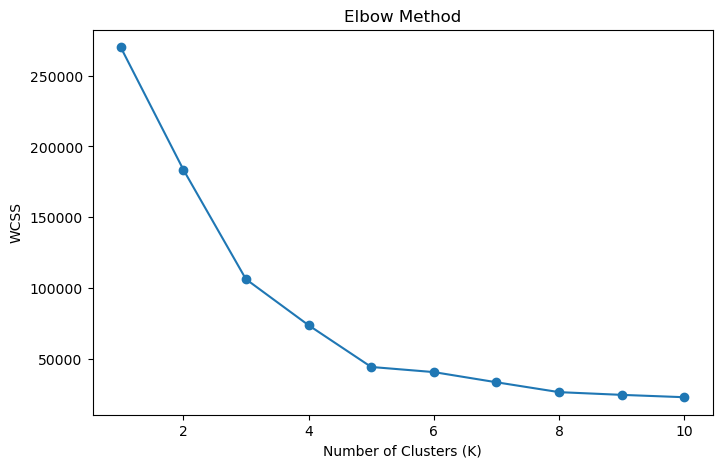

D:\python\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


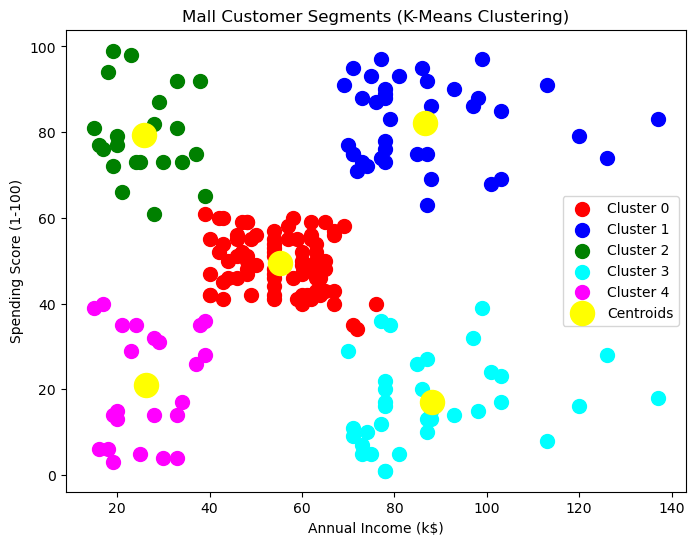


Cluster 0:
      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
43           44  Female   31                  39                      61   
46           47  Female   50                  40                      55   
47           48  Female   27                  40                      47   
48           49  Female   29                  40                      42   
49           50  Female   31                  40                      42   
..          ...     ...  ...                 ...                     ...   
121         122  Female   38                  67                      40   
122         123  Female   40                  69                      58   
126         127    Male   43                  71                      35   
132         133  Female   25                  72                      34   
142         143  Female   28                  76                      40   

     Cluster  
43         0  
46         0  
47         0  
48         0  

In [23]:
# Import Libraries
import os
os.environ["OMP_NUM_THREADS"] = "1"

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Step 1: Load the Dataset
df = pd.read_csv('Mall_Customers.csv')

# Step 2: Select Features for Clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Step 3: Elbow Method (Optional)
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.show()

# Step 4: Apply K-Means with K=5
k = 5
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Step 5: Visualize the Clusters
plt.figure(figsize=(8,6))
colors = ['red', 'blue', 'green', 'cyan', 'magenta']

for i in range(k):
    plt.scatter(
        X[df['Cluster'] == i]['Annual Income (k$)'],
        X[df['Cluster'] == i]['Spending Score (1-100)'],
        s=100,
        c=colors[i],
        label=f'Cluster {i}'
    )

# Plot Centroids
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    s=300,
    c='yellow',
    label='Centroids'
)

plt.title('Mall Customer Segments (K-Means Clustering)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# Step 6: Store Each Cluster Separately in Different DataFrames
cluster_0 = df[df['Cluster'] == 0]
cluster_1 = df[df['Cluster'] == 1]
cluster_2 = df[df['Cluster'] == 2]
cluster_3 = df[df['Cluster'] == 3]
cluster_4 = df[df['Cluster'] == 4]

# Step 7: (Optional) Print or Save Each Cluster
print("\nCluster 0:\n", cluster_0)
print("\nCluster 1:\n", cluster_1)
print("\nCluster 2:\n", cluster_2)
print("\nCluster 3:\n", cluster_3)
print("\nCluster 4:\n", cluster_4)

# Step 8: Save all clusters as separate CSV files (Optional)
# cluster_0.to_csv('cluster_0.csv', index=False)
# cluster_1.to_csv('cluster_1.csv', index=False)
# cluster_2.to_csv('cluster_2.csv', index=False)
# cluster_3.to_csv('cluster_3.csv', index=False)
# cluster_4.to_csv('cluster_4.csv', index=False)

print("\nAll clusters saved as separate CSV files.")


In [16]:
cluster_0.sort_values(by=['Annual Income (k$)','Spending Score (1-100)'])

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
43,44,Female,31,39,61,0
48,49,Female,29,40,42,0
49,50,Female,31,40,42,0
47,48,Female,27,40,47,0
46,47,Female,50,40,55,0
...,...,...,...,...,...,...
119,120,Female,50,67,57,0
122,123,Female,40,69,58,0
126,127,Male,43,71,35,0
132,133,Female,25,72,34,0


In [17]:
cluster_1.sort_values(by=['Annual Income (k$)','Spending Score (1-100)'])

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
123,124,Male,39,69,91,1
125,126,Female,31,70,77,1
129,130,Male,38,71,75,1
131,132,Male,39,71,75,1
127,128,Male,40,71,95,1
133,134,Female,31,72,71,1
137,138,Male,32,73,73,1
135,136,Female,29,73,88,1
139,140,Female,35,74,72,1
141,142,Male,32,75,93,1


In [18]:
cluster_2.sort_values(by=['Annual Income (k$)','Spending Score (1-100)'])

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
1,2,Male,21,15,81,2
3,4,Female,23,16,77,2
5,6,Female,22,17,76,2
7,8,Female,23,18,94,2
9,10,Female,30,19,72,2
11,12,Female,35,19,99,2
13,14,Female,24,20,77,2
15,16,Male,22,20,79,2
17,18,Male,20,21,66,2
19,20,Female,35,23,98,2


In [19]:
cluster_3.sort_values(by=['Annual Income (k$)','Spending Score (1-100)'])

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
124,125,Female,23,70,29,3
130,131,Male,47,71,9,3
128,129,Male,59,71,11,3
134,135,Male,20,73,5,3
136,137,Female,44,73,7,3
138,139,Male,19,74,10,3
140,141,Female,57,75,5,3
144,145,Male,25,77,12,3
146,147,Male,48,77,36,3
156,157,Male,37,78,1,3


In [20]:
cluster_4.sort_values(by=['Annual Income (k$)','Spending Score (1-100)'])

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
2,3,Female,20,16,6,4
4,5,Female,31,17,40,4
6,7,Female,35,18,6,4
8,9,Male,64,19,3,4
10,11,Male,67,19,14,4
14,15,Male,37,20,13,4
12,13,Female,58,20,15,4
16,17,Female,35,21,35,4
18,19,Male,52,23,29,4


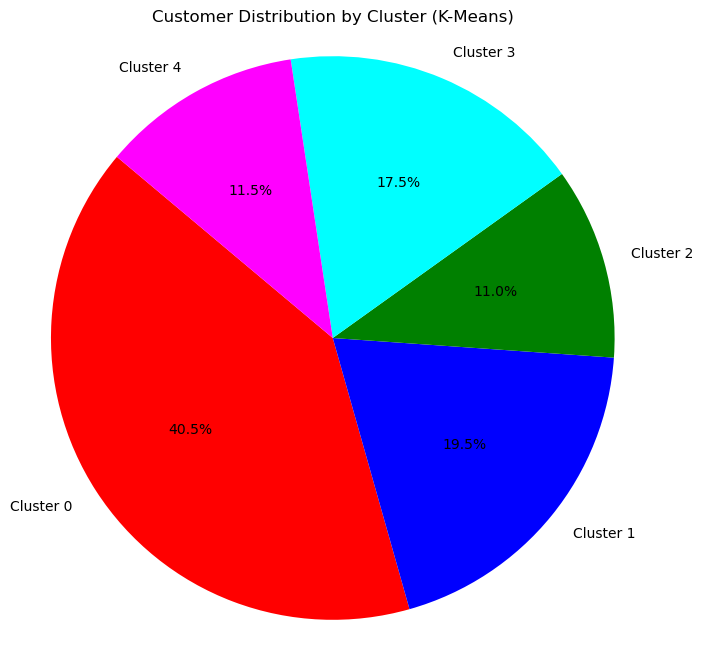

In [22]:
colors = ['red', 'blue', 'green', 'cyan', 'magenta']
cluster_counts = df['Cluster'].value_counts().sort_index()
plt.figure(figsize=(8,8))
plt.pie(
    cluster_counts,
    labels=[f'Cluster {i}' for i in range(k)],
    autopct='%1.1f%%',
    startangle=140,
    colors=colors
)
plt.title('Customer Distribution by Cluster (K-Means)')
plt.axis('equal')  # Equal aspect ratio for a perfect circle
plt.show()